In [2]:
 #Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
from nltk.corpus import stopwords
import nltk
import random


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
#import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

In [3]:
with open("2021-10-27-14-29-24-CDT-search-csv-export.csv", encoding='utf-8') as archivo:
   
    df=pd.read_table(archivo,delimiter = '\t')

archivo.close()

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
df

Page Name              User Name       Facebook Id  \
0          Guanajuato Sur Noticias          GuanajuatoSur   116533631798431   
1       Digital Noticias Michoacán    DigitalNoticiasMich   100044645704478   
2              Campeche Digital Mx         CampeDigitalMx   166788413383635   
3              Noticieros Televisa  NoticierosTelevisacom   105624182802445   
4                  Agencia Chiapas         AgenciaChiapas  1179249828824480   
...                            ...                    ...               ...   
299993  Unidad Cibernética Yucatán         CiberneticaYuc   729604647053311   
299994     Jorge de León Fernández         JorgeDeLeonFer   315040009133822   
299995           Mochileros.com.mx      mochileros.com.mx   371455319562611   
299996       Bienestar de Tlaxcala    BienestarDeTlaxcala   222533741835993   
299997                      Debate      periodicoeldebate      154988570902   

                  Page Category Page Admin Top Country  \
0                         MEDIA                     MX   
1            MEDIA_NEWS_COMPANY                     MX   
2                     COMMUNITY                     MX   
3            MEDIA_NEWS_COMPANY                     MX   
4            MEDIA_NEWS_COMPANY                     MX   
...                         ...                    ...   
299993  GOVERNMENT_ORGANIZATION                     MX   
299994               POLITICIAN                     MX   
299995            TRAVEL_AGENCY                     MX   
299996  GOVERNMENT_ORGANIZATION                     MX   
299997       MEDIA_NEWS_COMPANY                     MX   

                                         Page Description  \
0       Noticias y Reportajes de la Zona Sur del Estad...   
1                                     Portal informativo    
2       Se dedica a investigar las implicaciones cultu...   
3        Para entender la noticia. \nNoticieros Televisa.   
4       Compartimos tus denuncias y luchamos contra la...   
...                                                   ...   
299993  Unidad Especializada en Delitos Cibernéticos.\...   
299994  Diputado de Apodaca\n\n#MásCercaDeTi\n#ComiteC...   
299995  ✈🤩 Viajes épicos para jóvenes de 18 a 40 años ...   
299996  Delegación en Tlaxcala de "Bienestar". En dond...   
299997  -Te brindamos las noticias más destacadas de M...   

               Page Created  Likes at Posting  Followers at Posting  \
0       2011-12-26 18:16:08          150319.0              216905.0   
1       2017-01-23 04:48:04           50665.0               58595.0   
2       2011-06-06 02:31:22           12930.0               13867.0   
3       2010-03-26 01:07:29         8267499.0            12495903.0   
4       2016-08-06 22:34:08           13684.0               14440.0   
...                     ...               ...                   ...   
299993  2013-10-18 17:44:24            7909.0                8145.0   
299994  2019-02-01 19:20:47           15877.0               16303.0   
299995  2012-04-20 20:04:13         1963780.0             2083792.0   
299996  2018-12-05 00:41:39           74128.0               80332.0   
299997  2009-09-01 18:02:28         5819030.0             7044399.0   

                   Post Created  ...  \
0       2021-10-27 14:11:53 CDT  ...   
1       2021-10-27 14:10:17 CDT  ...   
2       2021-10-27 14:09:50 CDT  ...   
3       2021-10-27 14:09:04 CDT  ...   
4       2021-10-27 14:06:11 CDT  ...   
...                         ...  ...   
299993  2021-08-15 12:12:27 CDT  ...   
299994  2021-08-15 12:11:57 CDT  ...   
299995  2021-08-15 12:11:23 CDT  ...   
299996  2021-08-15 12:11:12 CDT  ...   
299997  2021-08-15 12:10:43 CDT  ...   

                                                  Message  \
0       #SALVATIERRA https://www.facebook.com/69082778...   
1       En Noviembre vacunarán con Cansino a 300 mil r...   
2       PARTICIPARÁ IMSS CAMPECHE EN DÉCIMA JORNADA NA...   
3       La jornada de vacunación se realiza en 11 muni...   
4      

In [5]:
df = df.drop_duplicates()

In [6]:
#Filtramos los mensajes nulos y le recreamos el índice
df2= df.dropna(how='any', subset=['Message']).reset_index(drop=True)
df2

Page Name              User Name       Facebook Id  \
0          Guanajuato Sur Noticias          GuanajuatoSur   116533631798431   
1       Digital Noticias Michoacán    DigitalNoticiasMich   100044645704478   
2              Campeche Digital Mx         CampeDigitalMx   166788413383635   
3              Noticieros Televisa  NoticierosTelevisacom   105624182802445   
4                  Agencia Chiapas         AgenciaChiapas  1179249828824480   
...                            ...                    ...               ...   
274830  Unidad Cibernética Yucatán         CiberneticaYuc   729604647053311   
274831     Jorge de León Fernández         JorgeDeLeonFer   315040009133822   
274832           Mochileros.com.mx      mochileros.com.mx   371455319562611   
274833       Bienestar de Tlaxcala    BienestarDeTlaxcala   222533741835993   
274834                      Debate      periodicoeldebate      154988570902   

                  Page Category Page Admin Top Country  \
0                         MEDIA                     MX   
1            MEDIA_NEWS_COMPANY                     MX   
2                     COMMUNITY                     MX   
3            MEDIA_NEWS_COMPANY                     MX   
4            MEDIA_NEWS_COMPANY                     MX   
...                         ...                    ...   
274830  GOVERNMENT_ORGANIZATION                     MX   
274831               POLITICIAN                     MX   
274832            TRAVEL_AGENCY                     MX   
274833  GOVERNMENT_ORGANIZATION                     MX   
274834       MEDIA_NEWS_COMPANY                     MX   

                                         Page Description  \
0       Noticias y Reportajes de la Zona Sur del Estad...   
1                                     Portal informativo    
2       Se dedica a investigar las implicaciones cultu...   
3        Para entender la noticia. \nNoticieros Televisa.   
4       Compartimos tus denuncias y luchamos contra la...   
...                                                   ...   
274830  Unidad Especializada en Delitos Cibernéticos.\...   
274831  Diputado de Apodaca\n\n#MásCercaDeTi\n#ComiteC...   
274832  ✈🤩 Viajes épicos para jóvenes de 18 a 40 años ...   
274833  Delegación en Tlaxcala de "Bienestar". En dond...   
274834  -Te brindamos las noticias más destacadas de M...   

               Page Created  Likes at Posting  Followers at Posting  \
0       2011-12-26 18:16:08          150319.0              216905.0   
1       2017-01-23 04:48:04           50665.0               58595.0   
2       2011-06-06 02:31:22           12930.0               13867.0   
3       2010-03-26 01:07:29         8267499.0            12495903.0   
4       2016-08-06 22:34:08           13684.0               14440.0   
...                     ...               ...                   ...   
274830  2013-10-18 17:44:24            7909.0                8145.0   
274831  2019-02-01 19:20:47           15877.0               16303.0   
274832  2012-04-20 20:04:13         1963780.0             2083792.0   
274833  2018-12-05 00:41:39           74128.0               80332.0   
274834  2009-09-01 18:02:28         5819030.0             7044399.0   

                   Post Created  ...  \
0       2021-10-27 14:11:53 CDT  ...   
1       2021-10-27 14:10:17 CDT  ...   
2       2021-10-27 14:09:50 CDT  ...   
3       2021-10-27 14:09:04 CDT  ...   
4       2021-10-27 14:06:11 CDT  ...   
...                         ...  ...   
274830  2021-08-15 12:12:27 CDT  ...   
274831  2021-08-15 12:11:57 CDT  ...   
274832  2021-08-15 12:11:23 CDT  ...   
274833  2021-08-15 12:11:12 CDT  ...   
274834  2021-08-15 12:10:43 CDT  ...   

                                                  Message  \
0       #SALVATIERRA https://www.facebook.com/69082778...   
1       En Noviembre vacunarán con Cansino a 300 mil r...   
2       PARTICIPARÁ IMSS CAMPECHE EN DÉCIMA JORNADA NA...   
3       La jornada de vacunación se realiza en 11 muni...   
4      

In [7]:
# Función que elimina los emoticonos de los mensajes
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticonos
        u"\U0001F300-\U0001F5FF"  # símbolos y pictografía
        u"\U0001F680-\U0001F6FF"  # símbolos de transporte y mapas
        u"\U0001F1E0-\U0001F1FF"  # banderas(iOS)
        u"\U0001F900-\U0001F9FF"  # símbolos y pictografía complementaria
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [8]:
#usamos la función maketrans para quitar los acentos 
a,b = 'áéíóúüñÁÉÍÓÚÜÑ','aeiouunAEIOUUN'
trans = str.maketrans(a,b)

nuevo_mnsj=[]
for i in df2.Message:
    m=deEmojify(str(i)).translate(trans)
    nuevo_mnsj.append(m)

In [9]:
df2['nuevo_mnsj']=nuevo_mnsj

In [10]:
df2.loc[:,['Message','nuevo_mnsj']]

Message  \
0       #SALVATIERRA https://www.facebook.com/69082778...   
1       En Noviembre vacunarán con Cansino a 300 mil r...   
2       PARTICIPARÁ IMSS CAMPECHE EN DÉCIMA JORNADA NA...   
3       La jornada de vacunación se realiza en 11 muni...   
4       Información importante sobre la vacunación a m...   
...                                                   ...   
274830  https://www.facebook.com/285058928236909/posts...   
274831  Muy atentos a este importante aviso de nuestro...   
274832                          ¡Nuevo post en el blog! 📌   
274833  📢 #Atención El día martes 17 de agosto, se lle...   
274834  Inicia aplicación de la segunda dosis de la va...   

                                               nuevo_mnsj  
0       #SALVATIERRA https://www.facebook.com/69082778...  
1       En Noviembre vacunaran con Cansino a 300 mil r...  
2       PARTICIPARA IMSS CAMPECHE EN DECIMA JORNADA NA...  
3       La jornada de vacunacion se realiza en 11 muni...  
4       Informacion importante sobre la vacunacion a m...  
...                                                   ...  
274830  https://www.facebook.com/285058928236909/posts...  
274831  Muy atentos a este importante aviso de nuestro...  
274832                           ¡Nuevo post en el blog!   
274833   #Atencion El dia martes 17 de agosto, se llev...  
274834  Inicia aplicacion de la segunda dosis de la va...  

[274835 rows x 2 columns]

In [11]:
##### Función para limpiar mensajes
# convertir un documento en tokens limpios
def limpieza(Message):
# dividido en tokens por espacio en blanco
    tokens = Message.split()
# preparar regex para el filtrado de caracteres
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# eliminar puntuación de cada palabra
    tokens = [re_punc.sub('', w) for w in tokens]
# eliminar los tokens restantes que no son alfabéticos
    tokens = [word for word in tokens if word.isalpha()]
# volver palabras a minúsculas
    tokens = [word.lower() for word in tokens]
# eliminar hipervínvulos
    tokens= [word for word in tokens if 'http' not in word]
# filtrar las palabras de parada
    stop_words = set(stopwords.words('spanish'))
    tokens = [w for w in tokens if not w in stop_words]
    return tokens

In [12]:
## Análisis de frecuencia de palabras para definir conjunto de palabras relevantes, se consideró una
## muestra aleatoria de aproximadamente el 10% de los mensajes.
aleatorios=[]
for i in range(27000):
    aleatorios.append(random.randrange(0, 274834))

In [13]:
#Función que crea una lista de las palabras del la muestra aleatoria
def palabras(df, aleatorio):
    palabras=[]
    for i in aleatorio:
        t=limpieza(df2.nuevo_mnsj[i])
        palabras=t+palabras
    return palabras

In [14]:
p=palabras(df2,aleatorios)

In [15]:
#Función para ver la frecuencia de las palabras
def frecuencia(lista):
    dic={}
    for palabra in lista:
        if palabra in dic.keys():
            dic[palabra] = dic[palabra]+ 1     #La palabra ya existe.
        else:
            dic[palabra]= 1       #La palabra es nueva.
    return dic

frq=frecuencia(p)
frq_s=dict(sorted(frq.items(), key=lambda item: item[1], reverse=True))
frq_s

{'vacunacion': 18065,
 'dosis': 14745,
 'anos': 12704,
 'vacuna': 12658,
 'salud': 9681,
 'mas': 8763,
 'personas': 7952,
 'vacunas': 6981,
 'mil': 6751,
 'segunda': 4880,
 'mexico': 4438,
 'poblacion': 3998,
 'edad': 3978,
 'aplicacion': 3915,
 'gobierno': 3591,
 'primera': 3572,
 'secretaria': 3539,
 'septiembre': 3483,
 'dia': 3371,
 'octubre': 3322,
 'menores': 3186,
 'casos': 3177,
 'covid': 3173,
 'nacional': 3110,
 'pfizer': 3099,
 'si': 3084,
 'asi': 3045,
 'jornada': 2883,
 'jovenes': 2745,
 'ninos': 2726,
 'millones': 2521,
 'tambien': 2519,
 'municipios': 2364,
 'hoy': 2325,
 'pandemia': 2191,
 'atencion': 2164,
 'dias': 2078,
 'municipio': 2064,
 'astrazeneca': 2058,
 'solo': 2007,
 'mayores': 1977,
 'chiapas': 1969,
 'recibir': 1929,
 'ser': 1910,
 'presidente': 1909,
 'estan': 1905,
 'centro': 1871,
 'dijo': 1830,
 'agosto': 1819,
 'medidas': 1815,
 'pais': 1752,
 'dos': 1747,
 'embarazadas': 1743,
 'semana': 1738,
 'partir': 1736,
 'federal': 1735,
 'mujeres': 1708,
 'lu

In [16]:
# Almacenamos la frecuencia de palabras en un dataframe para hacer un plotbar
df_cloud=pd.DataFrame.from_dict(frq_s,orient='index').rename(columns={0:'freq'})
df_cloud

freq
vacunacion  18065
dosis       14745
anos        12704
vacuna      12658
salud        9681
...           ...
kitten          1
ampolletas      1
catlover        1
olasin          1
ldm             1

[45810 rows x 1 columns]

In [1]:

def plot_bar(data=df_cloud, top=20):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df_cloud.iloc[:top,:].index, height = df_cloud.iloc[:top,0].values)
    plt.show()

NameError: name 'df_cloud' is not defined

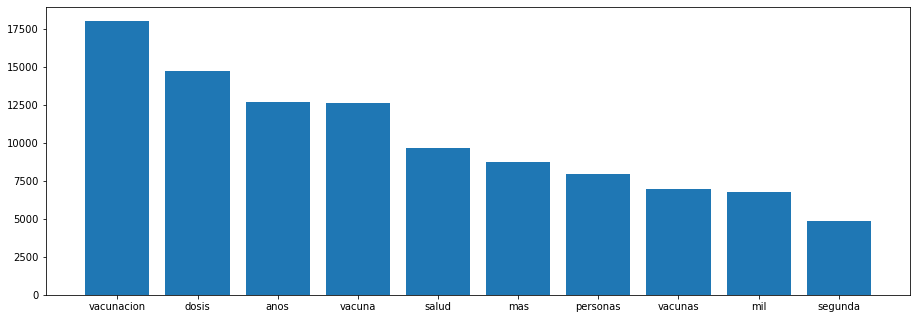

In [18]:
#Graficamos el TOP 10 de palabras por frecuencia
plot_bar(data=df_cloud, top=20)

In [19]:
#Función para localizar HashTags en los mensajes (los guarda en una lista que posteriormente se usará para agregar una columna al
#dataframe)
def HashTags(Message):
    tok=Message.split()
    ht=[]
    for i in tok:
        if '#' in i:
            ht.append(i)
    ht = [word.lower() for word in ht]
    return ht

In [20]:
ht_TOT=[]
for i in range(274835):
    h=HashTags(df2.nuevo_mnsj[i])
    ht_TOT.append(h)

In [21]:
df2['Hashtags']=ht_TOT

In [22]:
df2.Hashtags

0                                    [#salvatierra]
1                                      [#michoacan]
2                                                []
3                                                []
4                                                []
                            ...                    
274830                                           []
274831                                           []
274832                                           []
274833    [#atencion, #segundasdosis, #coaxomulco.]
274834                                           []
Name: Hashtags, Length: 274835, dtype: object

In [23]:
ht_TOT_2 = [x for l in ht_TOT for x in l]
frq_HT=frecuencia(ht_TOT_2)
frq_HT=dict(sorted(frq_HT.items(), key=lambda item: item[1], reverse=True))
frq_HT

{'#covid19': 23399,
 '#vacunacion': 6221,
 '#enterate': 5775,
 '#salud': 5491,
 '#vacuna': 4738,
 '#nacional': 3908,
 '#covid19.': 3640,
 '#mexico': 3466,
 '#vacunas': 3378,
 '#internacional': 2934,
 '#noticias': 2806,
 '#pfizer': 2800,
 '#astrazeneca': 2599,
 '#covid': 2514,
 '#covid19,': 2514,
 '#puebla': 2386,
 '#estrategiadevacunacion': 2318,
 '#atencion': 2260,
 '#covid-19': 2069,
 '#envivo': 1810,
 '#coronavirus': 1771,
 '#ultimahora': 1507,
 '#mundo': 1391,
 '#veracruz': 1340,
 '#edomex': 1337,
 '#covid_19': 1294,
 '#cuidateporloquemasquieras': 1285,
 '#tamaulipas': 1272,
 '#vacunacionanticovid19': 1208,
 '#sinovac': 1204,
 '#segundadosis': 1188,
 '#coahuila': 1141,
 '#almomento': 1134,
 '#local': 1111,
 '#sanadistancia': 1089,
 '#cdmx': 1083,
 '#pandemia': 1075,
 '#lavadodemanos': 1060,
 '#vacunate': 1035,
 '#usodecubrebocas': 1031,
 '#morelia': 993,
 '#noteconfies': 979,
 '#slp': 978,
 '#vacunacovid19': 975,
 '#saltillo': 971,
 '#sefuertemexico': 959,
 '#moderna': 924,
 '#quin

In [24]:
# Almacenamos la frecuencia de palabras en un dataframe para hacer un plotbar
df2_cloud2=pd.DataFrame.from_dict(frq_HT,orient='index').rename(columns={0:'ht'})
df2_cloud2

ht
#covid19         23399
#vacunacion       6221
#enterate         5775
#salud            5491
#vacuna           4738
...                ...
#areaurbana:         1
#acuerdo             1
#lupitasaldana       1
#enterateee.uu.      1
#nacional》a          1

[31884 rows x 1 columns]

In [25]:
df2_cloud2.ht[31883]

1

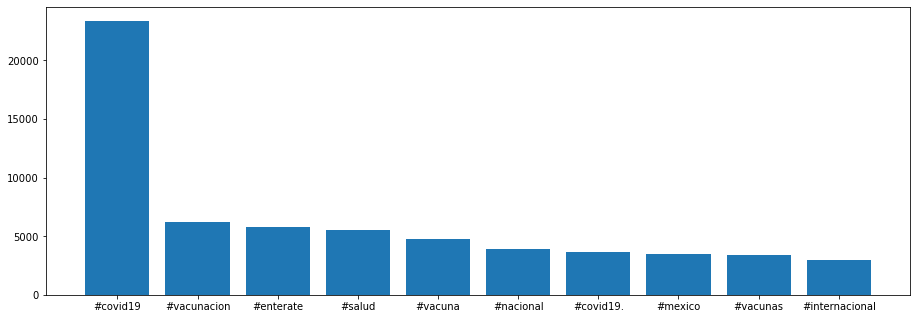

In [29]:
def plot_bar2(data=df2_cloud2, top=10):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df2_cloud2.iloc[:top,:].index, height = df2_cloud2.iloc[:top,0].values)
    plt.show()
#Graficamos el TOP 10 de palabras por frecuencia
plot_bar2(data=df2_cloud2, top=10)

## TFIDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Definimos al TF-IDF Vectorizer Object. Quitamos todas las stopwords
tfidf = TfidfVectorizer(stop_words=stopwords.words('spanish'), encoding='ascii')

#Quitamos Nan con espacios vacíos
df2['nuevo_mnsj'] = df2['nuevo_mnsj'].fillna('')

#Construimos la matriz TF-IDF:
tfidf_matrix = tfidf.fit_transform(df2['nuevo_mnsj'])

#OLa matriz tfidf_matrix tiene la siguiente forma:
tfidf_matrix.shapez
print(tfidf_matrix)

AttributeError: shapez not found